# Machine Learning Foundation

## Course 5, Part e: CNN DEMO

## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

In [1]:
import keras
#from tensorflow.keras.datasets import cifar10
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

In [4]:
import numpy as np
np.array([ [ [1,2], [2,22], [3,3], [4,4] ], [ [1,2], [2,22], [3,3], [4,4] ], [ [1,2], [2,22], [3,3], [4,4] ] ]).shape

(3, 4, 2)

In [5]:
x_train[444]

array([[[135, 163, 168],
        [134, 160, 164],
        [135, 160, 163],
        ...,
        [146, 169, 173],
        [151, 166, 173],
        [153, 168, 175]],

       [[140, 166, 173],
        [136, 164, 171],
        [136, 165, 172],
        ...,
        [158, 174, 171],
        [168, 179, 176],
        [187, 197, 194]],

       [[141, 166, 173],
        [136, 163, 171],
        [135, 164, 173],
        ...,
        [199, 207, 196],
        [217, 222, 209],
        [232, 237, 224]],

       ...,

       [[ 28,  21,  18],
        [ 28,  20,  17],
        [ 38,  30,  27],
        ...,
        [ 21,  21,  20],
        [ 18,  24,  14],
        [ 34,  28,  18]],

       [[ 56,  44,  39],
        [ 68,  56,  51],
        [ 76,  65,  59],
        ...,
        [ 26,  20,  17],
        [ 32,  27,  18],
        [ 43,  31,  22]],

       [[ 97,  79,  68],
        [102,  85,  74],
        [105,  88,  77],
        ...,
        [ 66,  51,  43],
        [ 74,  56,  47],
        [ 86,  67,  57]]

[9]


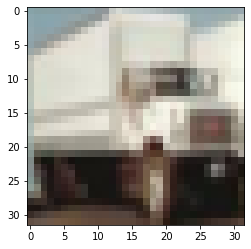

In [6]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
import tensorflow as ts
from keras.utils.np_utils import to_categorical
num_classes = 10

y_train = ts.keras.utils.to_categorical(y_train, num_classes)
y_test = ts.keras.utils.to_categorical(y_test, num_classes)

In [12]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [13]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

---

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [18]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [25]:
model_2 = Sequential()
model_2.add(Conv2D(64, (5, 5), strides=(2,2), padding='same', input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

model_2.add(Conv2D(64, (5,5), strides=(2,2)))
model_2.add(Activation('relu'))

model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 16, 16, 64)        4864      
_________________________________________________________________
activation_20 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 64)          102464    
_________________________________________________________________
activation_21 (Activation)   (None, 6, 6, 64)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)              

In [28]:
batch_size = 32
opt = keras.optimizers.RMSprop(lr = 0.0005, decay=1e-6)

model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_2.fit(x_train, y_train, batch_size=batch_size, epochs=15, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 36s 22ms/step - loss: 1.0823 - accuracy: 0.6229 - val_loss: 1.0449 - val_accuracy: 0.6330
Epoch 2/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0276 - accuracy: 0.6464 - val_loss: 0.9925 - val_accuracy: 0.6579
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0087 - accuracy: 0.6531 - val_loss: 1.0528 - val_accuracy: 0.6453
Epoch 4/15
1187/1563 [=====================>........] - ETA: 7s - loss: 1.0055 - accuracy: 0.6546

KeyboardInterrupt: 

We still have 181K parameters, even though this is a "small" model.


In [19]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

c:\users\jiwoo\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/15
1563/1563 [==============================] - 31s 13ms/step - loss: 1.9301 - accuracy: 0.2852 - val_loss: 1.4541 - val_accuracy: 0.4702
Epoch 2/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4969 - accuracy: 0.4608 - val_loss: 1.2834 - val_accuracy: 0.5399
Epoch 3/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.3691 - accuracy: 0.5094 - val_loss: 1.2447 - val_accuracy: 0.5503
Epoch 4/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.2962 - accuracy: 0.5368 - val_loss: 1.1756 - val_accuracy: 0.5794
Epoch 5/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2341 - accuracy: 0.5641 - val_loss: 1.1166 - val_accuracy: 0.6089
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2079 - accuracy: 0.5727 - val_loss: 1.1296 - val_accuracy: 0.6004
Epoch 7/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1703 - accuracy: 0.5841 - val_loss: 1.0711 -

### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 5 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

5. Try different structures and run times, and see how accurate your model can be.


In [29]:
# Let's build a CNN using Keras' Sequential capabilities

model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

In [30]:
## Check number of parameters

model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)       

In [31]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model_3.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [32]:
model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 110s 69ms/step - loss: 1.7917 - accuracy: 0.3406 - val_loss: 1.2641 - val_accuracy: 0.5417
Epoch 2/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.2065 - accuracy: 0.5739 - val_loss: 1.1798 - val_accuracy: 0.5909
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.0218 - accuracy: 0.6401 - val_loss: 0.9618 - val_accuracy: 0.6681
Epoch 4/5
1563/1563 [==============================] - 109s 70ms/step - loss: 0.9178 - accuracy: 0.6788 - val_loss: 0.8941 - val_accuracy: 0.6921
Epoch 5/5
1563/1563 [==============================] - 107s 68ms/step - loss: 0.8528 - accuracy: 0.6999 - val_loss: 0.8108 - val_accuracy: 0.7288


In [40]:
model_4 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_4.add(Conv2D(16, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_4.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_4.add(Conv2D(16, (5, 5), strides = (2,2)))
model_4.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_4.add(Flatten())
model_4.add(Dense(288))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

M4 = model_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 2.0053 - accuracy: 0.2543 - val_loss: 1.5716 - val_accuracy: 0.4335
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6142 - accuracy: 0.4128 - val_loss: 1.4441 - val_accuracy: 0.4812
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5261 - accuracy: 0.4500 - val_loss: 1.4295 - val_accuracy: 0.4873
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4672 - accuracy: 0.4734 - val_loss: 1.3673 - val_accuracy: 0.5136
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4316 - accuracy: 0.4849 - val_loss: 1.3552 - val_accuracy: 0.5227


In [41]:
import pickle
# pickle.dump(model_1, open('cnn_model_1.p', 'wb'))
# pickle.dump(model_2, open('cnn_model_2.p', 'wb'))
pickle.dump(M4, open('cnn_model_4.p', 'wb'))

TypeError: cannot pickle 'weakref' object

In [4]:
# load cnn models
import pickle
model_1 = pickle.load(open('cnn_model_1.p', 'rb'))
# model_2 = pickle.load(open('cnn_model_2.p', 'rb'))
# model_3 = pickle.load(open('cnn_model_3.p', 'rb'))

EOFError: Ran out of input

In [3]:
model_1.summary()

NameError: name 'model_1' is not defined

---
### Machine Learning Foundation (C) 2020 IBM Corporation